In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

from matplotlib.pyplot import figure

import plotly.express as px

In [ ]:
# Loading Transport dataset

transport_df = pd.read_csv('/content/drive/MyDrive/data/Transport_5_years/combined_transport_Sep.csv')
print("Number of records in the trasnport dataset:", len(transport_df))

Number of records in the trasnport dataset: 2594209


In [ ]:
transport_df.describe()

YEAR      MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  2.594209e+06  2594209.0  2.594209e+06  2.594209e+06   
mean   2.021062e+03        9.0  1.554589e+01  3.984760e+00   
std    1.465576e+00        0.0  8.645298e+00  1.984303e+00   
min    2.019000e+03        9.0  1.000000e+00  1.000000e+00   
25%    2.020000e+03        9.0  8.000000e+00  2.000000e+00   
50%    2.021000e+03        9.0  1.600000e+01  4.000000e+00   
75%    2.022000e+03        9.0  2.300000e+01  6.000000e+00   
max    2.023000e+03        9.0  3.000000e+01  7.000000e+00   

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
count           2.594209e+06       2.594209e+06       2.594209e+06   
mean            1.997188e+04       2.531494e+03       1.263824e+04   
std             3.758675e+02       1.737236e+03       1.532957e+03   
min             1.939300e+04       1.000000e+00       1.013500e+04   
25%             1.979000e+04       1.075000e+03       1.129200e+04   
50%             1.993000e+04       2.194000e+03       1.288900e+04   
75%             2.036600e+04       3.810000e+03       1.393100e+04   
max             2.045200e+04       8.819000e+03       1.686900e+04   

       ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  DEST_AIRPORT_ID  ...  \
count           2.594209e+06           2.594209e+06     2.594209e+06  ...   
mean            1.263828e+06           3.171905e+04     1.263824e+04  ...   
std             1.532955e+05           1.317972e+03     1.532948e+03  ...   
min             1.013505e+06           3.007000e+04     1.013500e+04  ...   
25%             1.129202e+06           3.061500e+04     1.129200e+04  ...   
50%             1.288903e+06           3.145300e+04     1.288900e+04  ...   
75%             1.393102e+06           3.246700e+04     1.393100e+04  ...   
max             1.686902e+06           3.610100e+04     1.686900e+04  ...   

       ARR_DELAY_NEW     ARR_DEL15     CANCELLED      DIVERTED      DISTANCE  \
count   2.554800e+06  2.554800e+06  2.594209e+06  2.594209e+06  2.594209e+06   
mean    1.043511e+01  1.458823e-01  1.322870e-02  1.962448e-03  8.015160e+02   
std     4.260502e+01  3.529882e-01  1.142528e-01  4.425604e-02  5.873799e+02   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.100000e+01   
25%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.720000e+02   
50%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.430000e+02   
75%     3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.029000e+03   
max     3.027000e+03  1.000000e+00  1.000000e+00  1.000000e+00  5.095000e+03   

       CARRIER_DELAY  WEATHER_DELAY      NAS_DELAY  SECURITY_DELAY  \
count  372700.000000  372700.000000  372700.000000   372700.000000   
mean       25.144889       3.315506      13.348312        0.136635   
std        73.382439      27.761106      34.991789        3.023114   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         3.000000       0.000000       0.000000        0.000000   
75%        23.000000       0.000000      17.000000        0.000000   
max      3027.000000    1301.000000    1567.000000      600.000000   

       LATE_AIRCRAFT_DELAY  
count        372700.000000  
mean             23.527854  
std              54.779672  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%              26.000000  
max            2329.000000  

[8 rows x 28 columns]

In [ ]:
# Getting Airport and Airline names

data = ""
with open("/content/drive/MyDrive/AirCode.txt", "r") as f:
  data = f.read()
  f.close()

data = data.split("\n")
airport_codes = {}
for d in data:
  temp = d.split(":")
  airport_codes[temp[0]] = temp[1]

airlines = pd.read_csv('/content/drive/MyDrive/airlines.csv')
airports = pd.read_csv('/content/drive/MyDrive/airports.csv')
airports = airports.rename(columns={'IATA_CODE':'ORIGIN'})
airlines = airlines.rename(columns={'IATA_CODE':'OP_UNIQUE_CARRIER'})

In [ ]:

transport_df = transport_df.merge(airports, on='ORIGIN')
transport_df = transport_df.merge(airlines, on='OP_UNIQUE_CARRIER')

Visualizations

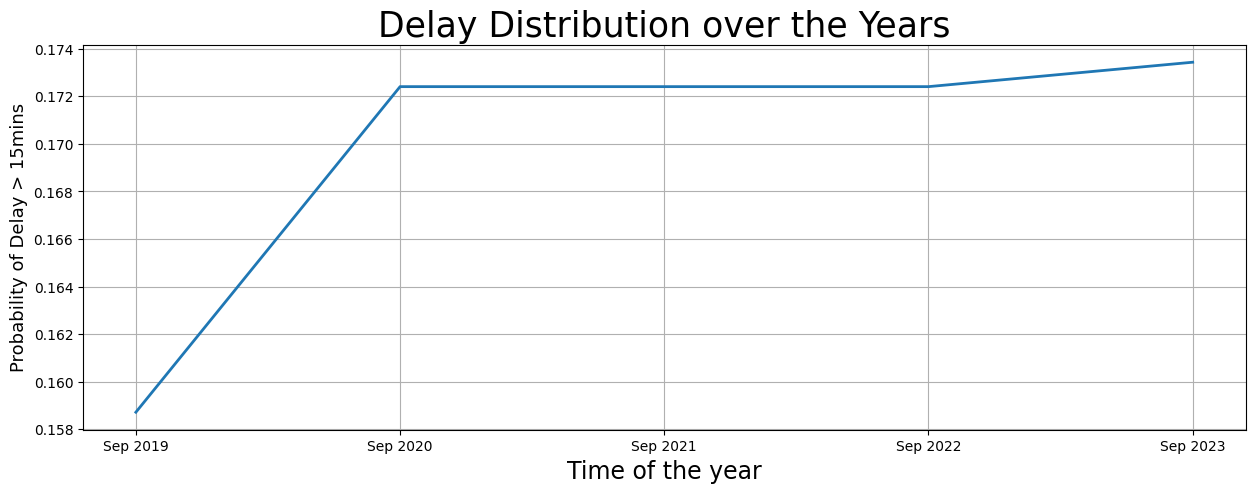

In [ ]:
transport_df['IS_DELAY'] = np.where((transport_df['DEP_DEL15'] == 1) | (transport_df['ARR_DEL15'] == 1), 1, 0)

delay_distribution = (
    transport_df
    .assign(flight_day = transport_df['YEAR'],
            is_delayed = transport_df['IS_DELAY'])
    .groupby('flight_day')
    .is_delayed.mean()
    .rolling(7, min_periods=1, center=True)
    .mean()
)

plt.figure(figsize=(15,5))
plt.plot(delay_distribution, linewidth=2)
period_starts = np.arange(2019,2024,1)
period_names = ['Sep 2019', 'Sep 2020', 'Sep 2021', 'Sep 2022', 'Sep 2023']
plt.xticks(period_starts, labels=period_names)
plt.grid()
plt.title('Delay Distribution over the Years', fontsize=25)
plt.xlabel('Time of the year', fontsize=17)
plt.ylabel('Probability of Delay > 15mins', fontsize=13)
plt.show()

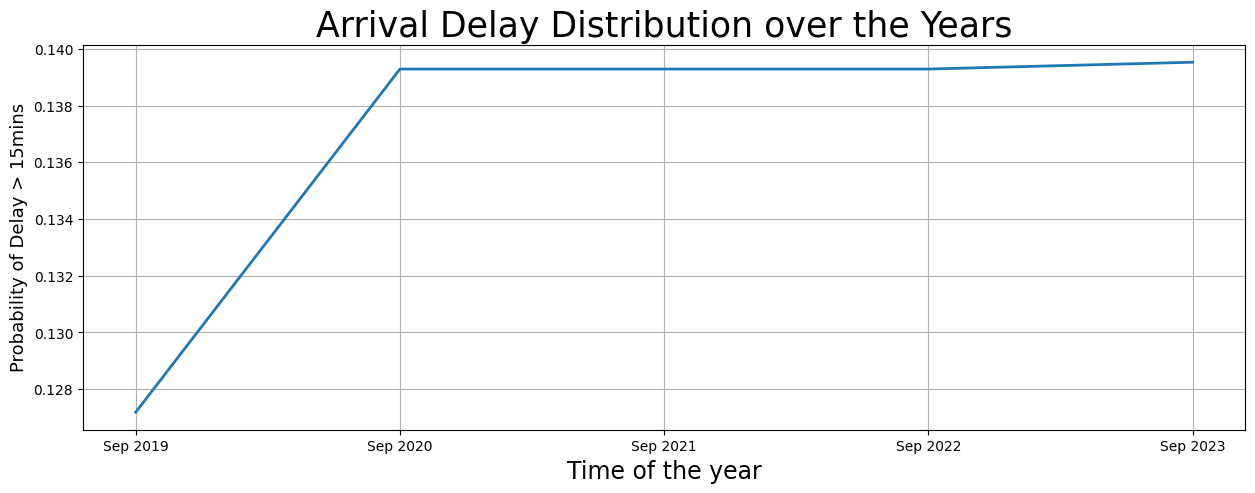

In [ ]:
delay_distribution = (
    transport_df
    .assign(flight_day = transport_df['YEAR'],
            is_delayed = transport_df['ARR_DELAY_NEW'] >= 15)
    .groupby('flight_day')
    .is_delayed.mean()
    .rolling(7, min_periods=1, center=True)
    .mean()
)

plt.figure(figsize=(15,5))
plt.plot(delay_distribution, linewidth=2)
period_starts = np.arange(2019,2024,1)
period_names = ['Sep 2019', 'Sep 2020', 'Sep 2021', 'Sep 2022', 'Sep 2023']
plt.xticks(period_starts, labels=period_names)
plt.grid()
plt.title('Arrival Delay Distribution over the Years', fontsize=25)
plt.xlabel('Time of the year', fontsize=17)
plt.ylabel('Probability of Delay > 15mins', fontsize=13)
plt.show()

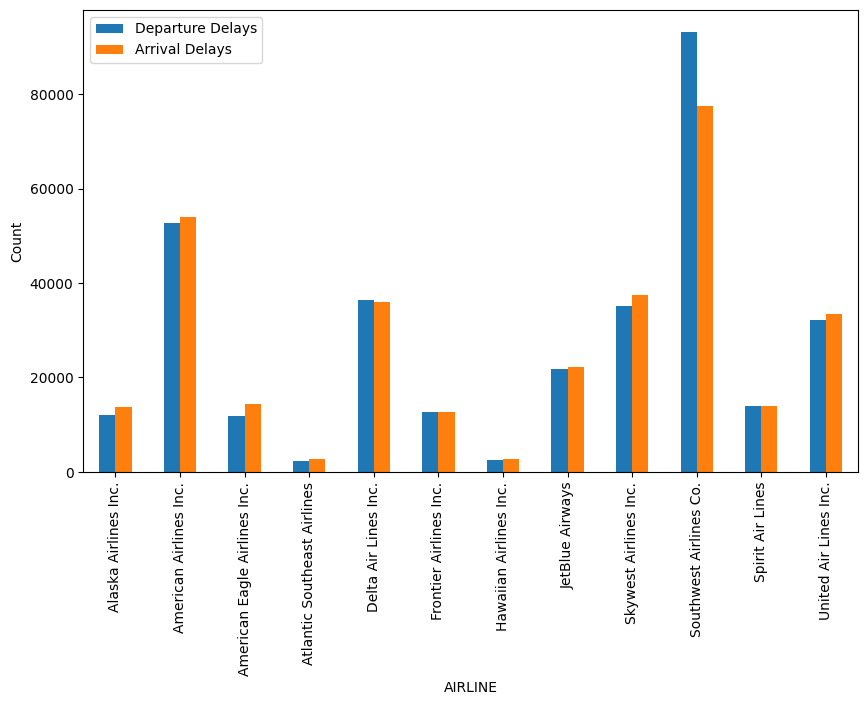

In [ ]:
# Number of Arrival and Departure delays

data_select = transport_df.loc[:, ['AIRLINE', 'DEP_DEL15', 'ARR_DEL15']]
data_select = data_select[(data_select['DEP_DEL15'] == 1) | (data_select['ARR_DEL15'] == 1)]
data_select = data_select.groupby('AIRLINE').sum()
ax = data_select.plot(kind='bar', figsize=(10,6))
ax.legend(['Departure Delays', 'Arrival Delays'])
plt.ylabel('Count')
plt.show()

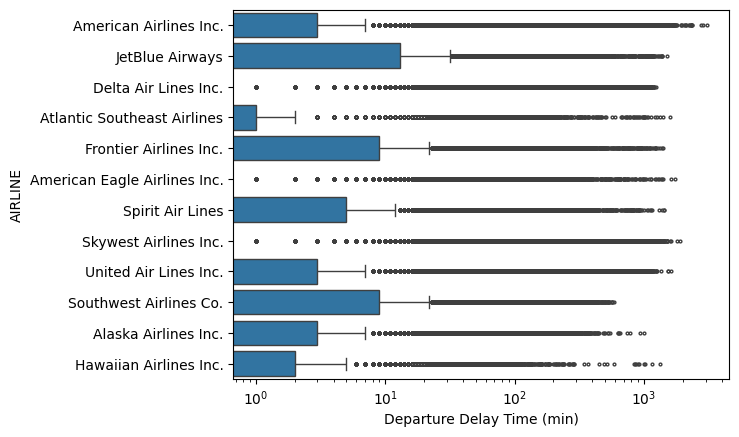

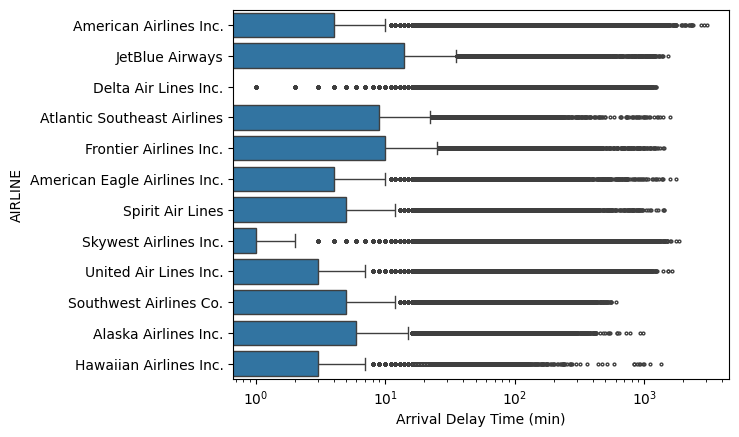

In [ ]:
# Box Plot showing arrival and departure delay times per Airline

a = transport_df.loc[:, ['DEP_DELAY_NEW', 'ARR_DELAY_NEW','AIRLINE']]
ax = sns.boxplot(y='AIRLINE', x='DEP_DELAY_NEW', data=a, linewidth=1, fliersize=2)
ax.set(xscale="log", xlabel='Departure Delay Time (min)') #will ignore the negative value (no delays)
plt.show()

ax = sns.boxplot(y='AIRLINE', x='ARR_DELAY_NEW', data=a, linewidth=1, fliersize=2)
ax.set(xscale="log", xlabel='Arrival Delay Time (min)') #will ignore the negative value (no delays)
plt.show()

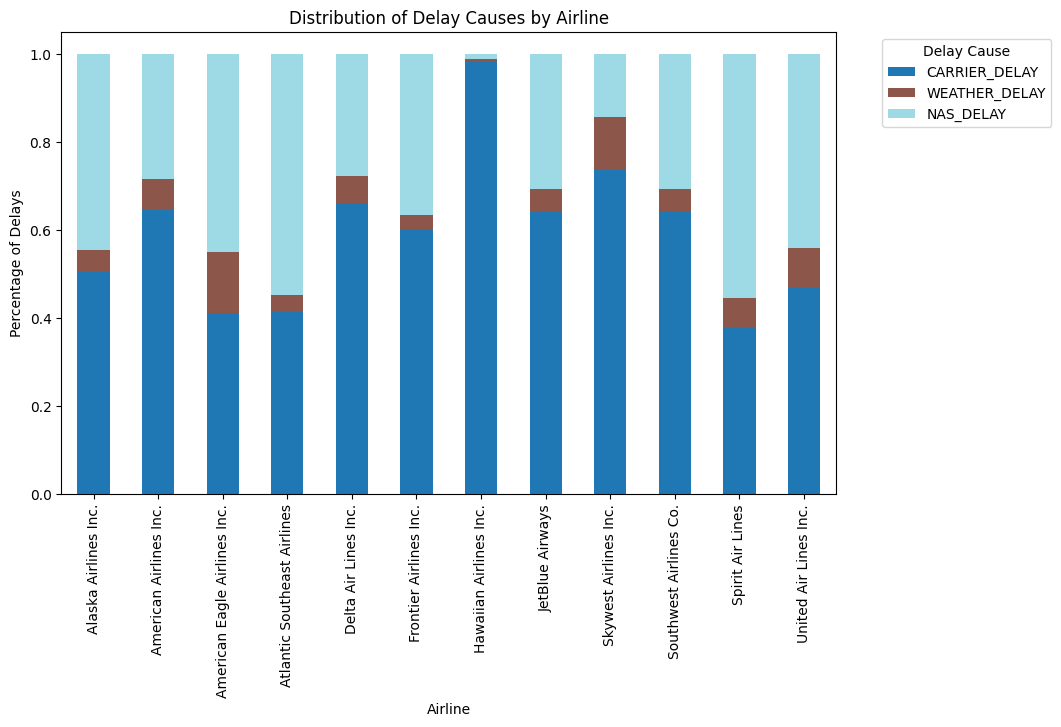

In [ ]:
# Aggregate delay causes by weather, grouped by airlines
delay_causes = transport_df.groupby('AIRLINE')[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']].sum()

# Normalize delay values for stacking
delay_causes_norm = delay_causes.div(delay_causes.sum(axis=1), axis=0)

# Create stacked bar chart
delay_causes_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xlabel("Airline")
plt.ylabel("Percentage of Delays")
plt.title("Distribution of Delay Causes by Airline")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1))
plt.show()

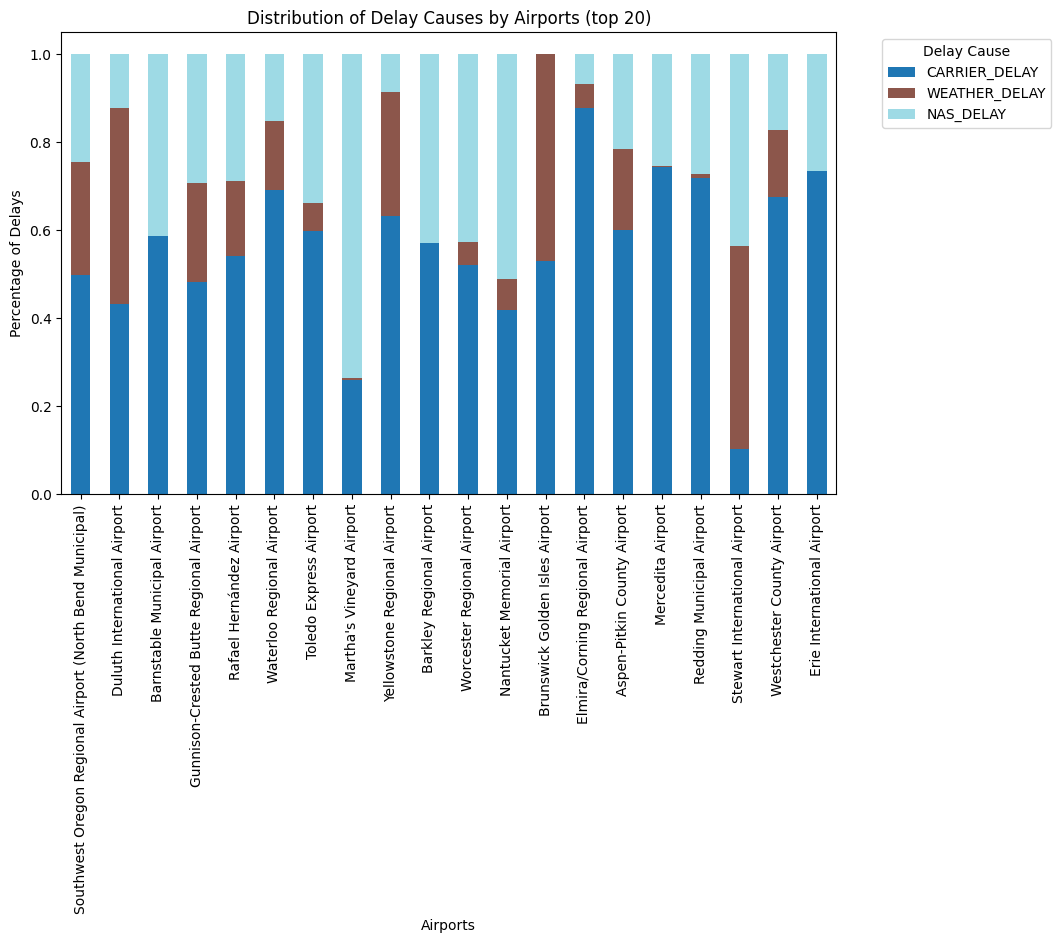

In [ ]:
# Aggregate delay causes by weather, grouped by Airports (Top 20)

delay_causes = transport_df.groupby('AIRPORT')[['DEP_DELAY_NEW', 'ARR_DELAY_NEW','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']].mean()
delay_causes['Total_Delay'] = delay_causes['DEP_DELAY_NEW'] + delay_causes['ARR_DELAY_NEW']
delay_causes = delay_causes.sort_values(by='Total_Delay', ascending=False)[:20]
delay_causes = delay_causes[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']]
delay_causes_norm = delay_causes.div(delay_causes.sum(axis=1), axis=0)

delay_causes_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xlabel("Airports")
plt.ylabel("Percentage of Delays")
plt.title("Distribution of Delay Causes by Airports (top 20)")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
map_ = folium.Map(location=[37.0902, -95.7129],tiles="OpenStreetMap", zoom_start = 4, min_zoom=3)
df = transport_df[['LATITUDE', 'LONGITUDE', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW',]]
df = df[(df['DEP_DELAY_NEW'] >= 15) | (df['ARR_DELAY_NEW'] >= 15)]
df.dropna(inplace=True)
data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map_)
map_title = "Heatmap showing region-wise delay"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map_.get_root().html.add_child(folium.Element(title_html))
map_.save('map-with-title.html')
map_

<ipython-input-34-6e3e8f913955>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
scatter = transport_df[['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW', 'ARR_DELAY_NEW']]
scatter.dropna(inplace=True)
# scatter = scatter[scatter['DEP_DELAY_NEW'] >= 15]
scatter['TOTAL_DELAY'] = scatter['DEP_DELAY_NEW'] + scatter['ARR_DELAY_NEW']
scatter = scatter.groupby(['LATITUDE', 'LONGITUDE','AIRPORT'], as_index=False).TOTAL_DELAY.mean()

fig = px.scatter_mapbox(scatter, lat="LATITUDE", lon="LONGITUDE", hover_data=["AIRPORT", 'TOTAL_DELAY'], color="TOTAL_DELAY",
            zoom=3, height=500, title='Scatter plot showing average delay times at different airports')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

<ipython-input-38-32547ae80013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter.dropna(inplace=True)
<ipython-input-38-32547ae80013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter['TOTAL_DELAY'] = scatter['DEP_DELAY_NEW'] + scatter['ARR_DELAY_NEW']


In [ ]:
d_types = transport_df[['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW', 'ARR_DELAY_NEW','CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY',
                        # 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
                        ]]
d_types.dropna(inplace=True)
# scatter = scatter[scatter['DEP_DELAY_NEW'] >= 15]
d_types = d_types.groupby(['LATITUDE', 'LONGITUDE','AIRPORT'], as_index=False).mean()

main_delays = d_types.set_index(['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW', 'ARR_DELAY_NEW']).idxmax(axis=1).reset_index()
main_delays = main_delays.rename(columns={0:'MAIN_DELAY_REASON'})

fig = px.scatter_mapbox(main_delays, lat="LATITUDE", lon="LONGITUDE", hover_data=["AIRPORT", 'MAIN_DELAY_REASON'], color='MAIN_DELAY_REASON',
            zoom=3, height=400, title='Scatter plot showing main delay cause at different airports')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

<ipython-input-39-bc82a623fb0c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go

transport_df_2023 = transport_df[transport_df['YEAR'] == 2023]
transport_df_2023['TOTAL_DELAY'] = transport_df_2023['DEP_DELAY_NEW'] + transport_df_2023['ARR_DELAY_NEW']

od = transport_df_2023.groupby(['ORIGIN', 'DEST'], as_index=False)['TOTAL_DELAY'].mean()

od = od.sort_values('TOTAL_DELAY', ascending=False)[:50]
od = od.reset_index()

fig = go.Figure()

for i in range(len(od)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lat = [airports[airports['ORIGIN'] == od['ORIGIN'][i]]['LATITUDE'].item(), airports[airports['ORIGIN'] == od['DEST'][i]]['LATITUDE'].item()],
            lon = [airports[airports['ORIGIN'] == od['ORIGIN'][i]]['LONGITUDE'].item(), airports[airports['ORIGIN'] == od['DEST'][i]]['LONGITUDE'].item()],
            mode = 'lines',
            line = dict(width = 2,color = 'red'),
            opacity = float(od['TOTAL_DELAY'][i]) / float(od['TOTAL_DELAY'].max()),
            hoverinfo='text',
            text = f"{airports[airports['ORIGIN'] == od['ORIGIN'][i]]['AIRPORT'].item()}   to   {airports[airports['ORIGIN'] == od['DEST'][i]]['AIRPORT'].item()}",
            textposition='top center',
        ))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['LONGITUDE'],
    lat = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['LATITUDE'],
    hoverinfo = 'text',
    hovertext = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports[airports['ORIGIN'].isin(od['DEST'])]['LONGITUDE'],
    lat = airports[airports['ORIGIN'].isin(od['DEST'])]['LATITUDE'],
    hoverinfo = "text",
    hovertext = airports[airports['ORIGIN'].isin(od['DEST'])]['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(0, 0, 255)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.update_layout(
    title_text = '2023 Top 50 delayed flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        visible=False, resolution=50, scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    showland=True,landcolor="rgb(210, 217, 217)"
    ),
)

fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})

fig.show()

<ipython-input-49-92935352ded0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualizations for Transport data combined with BirdStrike Data

In [ ]:
combined_df = pd.read_csv("/content/drive/MyDrive/SD/combined_all_SD.csv")
combined_df["DAMAGE_LEVEL"].replace("0","N", inplace=True)

<ipython-input-33-50525918a1c2>:1: DtypeWarning:

Columns (60,134) have mixed types. Specify dtype option on import or set low_memory=False.



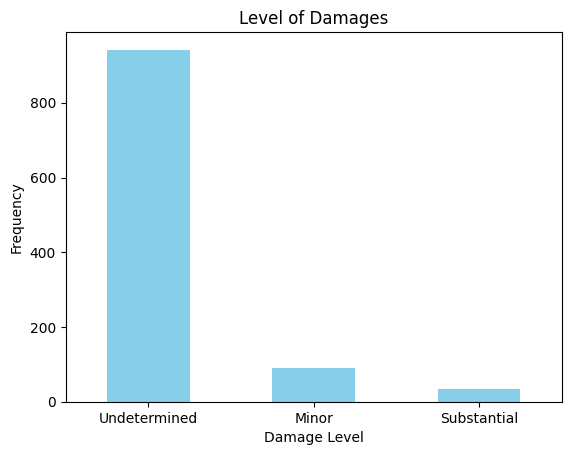

In [ ]:
import matplotlib.pyplot as plt
new_values = {"N":"None","M?":"Undetermined","M":"Minor","S":"Substantial"}
damage_counts = combined_df["DAMAGE_LEVEL"].replace(new_values)
damage_counts = damage_counts[damage_counts!="None"]
value_counts = damage_counts.value_counts()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Level of Damages')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

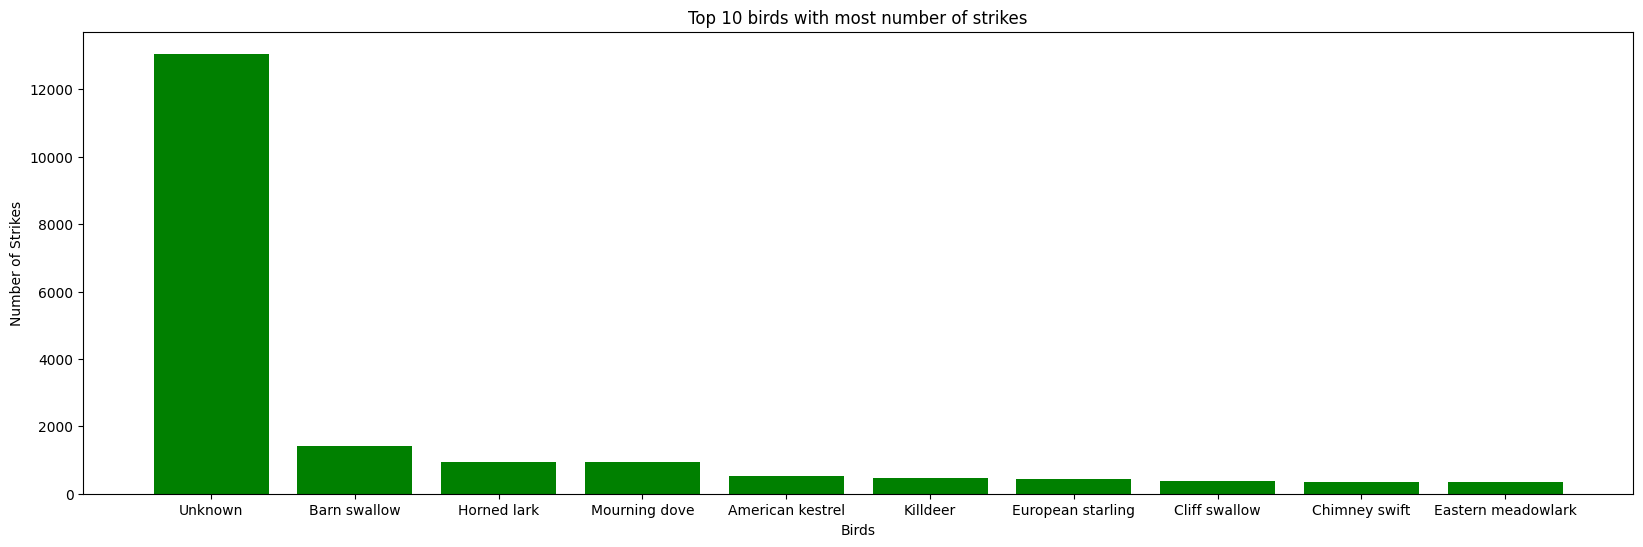

In [ ]:
new_df = combined_df['SPECIES'].apply(lambda x: 'Unknown' if x.startswith('Unknown') else x)
top_species = new_df.value_counts().nlargest(10)

figure(figsize=(20, 6))
plt.bar(list(top_species.keys()), top_species.values, color='green')
plt.title('Top 10 birds with most number of strikes')
plt.xlabel('Birds')
plt.ylabel('Number of Strikes')
plt.show()

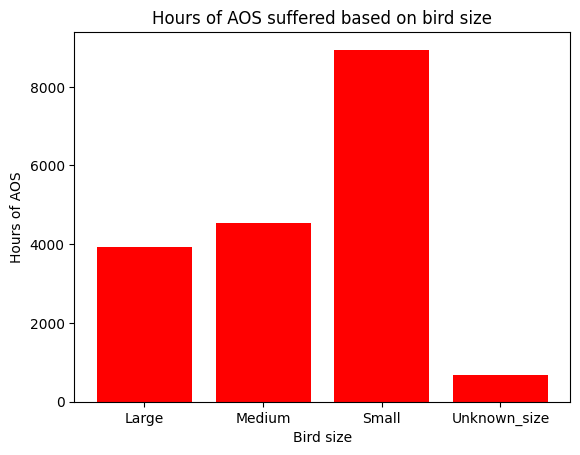

In [ ]:
grouped_data = dict(combined_df.groupby('SIZE')['AOS'].sum())
grouped_data["Unknown_size"] = grouped_data.pop("0", None)

plt.bar(list(grouped_data.keys()), list(grouped_data.values()), color='red')
plt.title('Hours of AOS suffered based on bird size')
plt.xlabel('Bird size')
plt.ylabel('Hours of AOS')
plt.show()

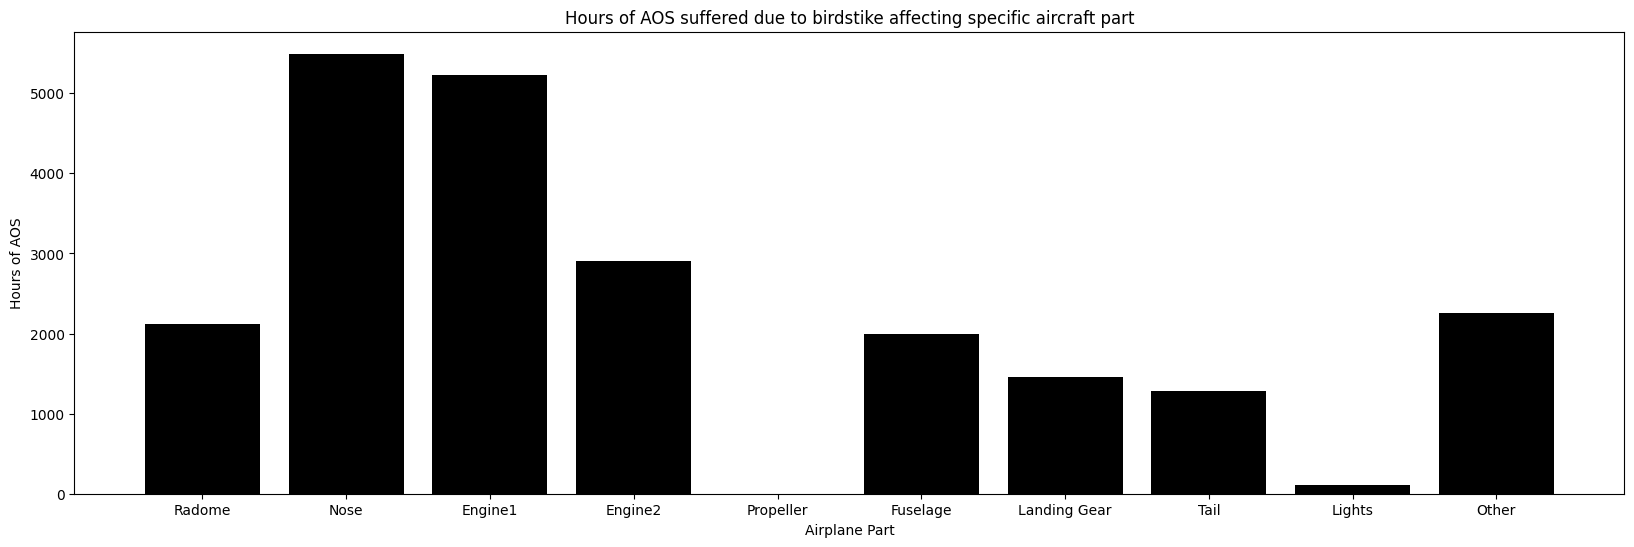

In [ ]:
struck_columns = ["STR_RAD", "STR_NOSE","STR_ENG1","STR_ENG2", "STR_PROP","STR_FUSE","STR_LG","STR_TAIL","STR_LGHTS","STR_OTHER"]
parts = ["Radome","Nose", "Engine1", "Engine2", "Propeller", "Fuselage","Landing Gear","Tail","Lights", "Other"]
dicti = {}
for i in range(len(struck_columns)):
  col = struck_columns[i]
  current_part = combined_df[combined_df[col]==1]
  part = parts[i]
  dicti[part] = current_part["AOS"].sum()

figure(figsize=(20, 6))
plt.bar(list(dicti.keys()), list(dicti.values()), color='black')
plt.title('Hours of AOS suffered due to birdstike affecting specific aircraft part')
plt.xlabel('Airplane Part')
plt.ylabel('Hours of AOS')
plt.show()

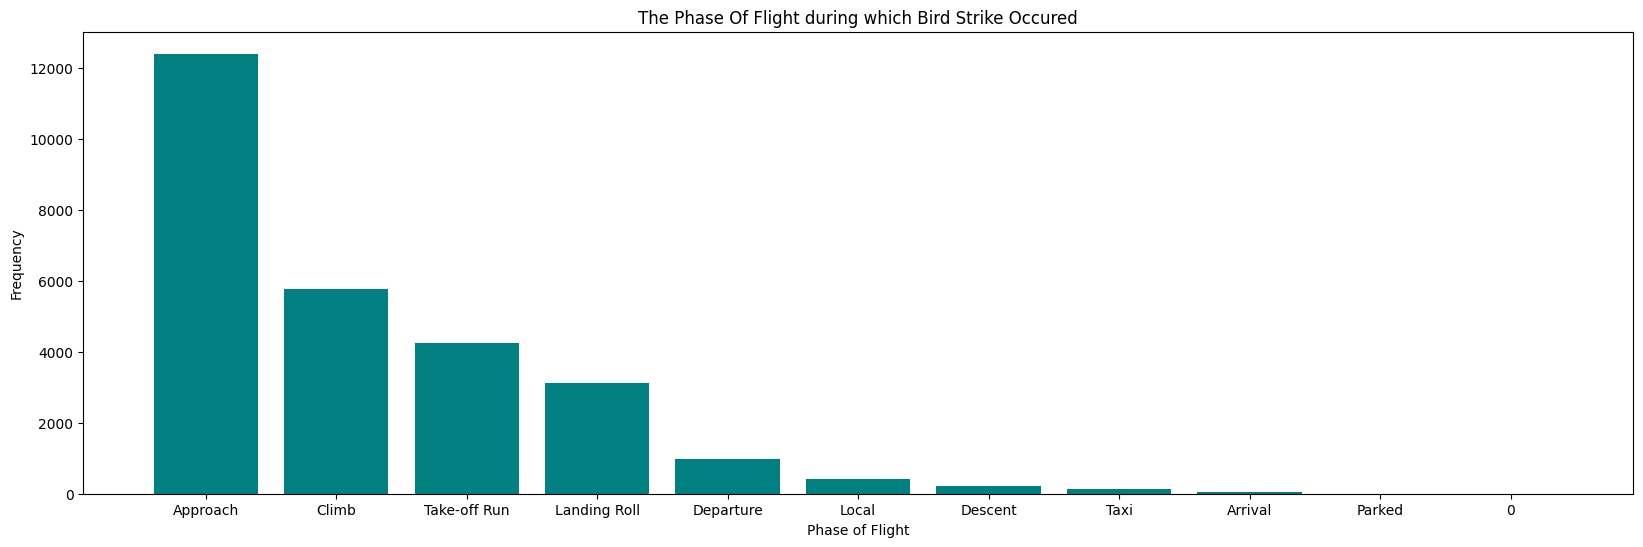

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6))
phase = combined_df["PHASE_OF_FLIGHT"]
plt.bar(phase.unique(),phase.value_counts(), color='teal')
plt.title('The Phase Of Flight during which Bird Strike Occured')
plt.xlabel('Phase of Flight')
plt.ylabel('Frequency')
plt.show()